<h1 style="text-align:center">Face detector</h1>

Libraries

In [1]:
import kaggle
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from shutil import copyfile
import pandas as pd

Dataset

In [2]:
dataset = "lfw"

(MTCNN) - Boundig Box

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


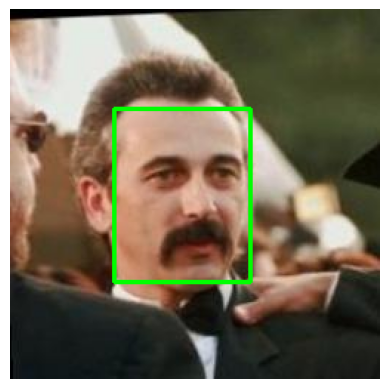

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[{'box': [70, 67, 92, 117], 'confidence': 0.9945569038391113, 'keypoints': {'left_eye': (104, 113), 'right_eye': (145, 111), 'nose': (129, 134), 'mouth_left': (110, 158), 'mouth_right': (144, 158)}}]


In [4]:
def detect_faces(image_path):
    detector = MTCNN()
    image = cv2.imread(image_path)
    result = detector.detect_faces(image)
    return result

def draw_faces(image_path):
    faces = detect_faces(image_path)
    image = cv2.imread(image_path)
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


img_path = 'lfw/10.jpg'
draw_faces(img_path)
print(detect_faces(img_path))

Generate bounding boxes

In [ ]:
def numeric_sort_key(s):
    """ Helper function to sort strings with numeric values correctly. """
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def process_batch(detector, image_folder, batch):
    data = []
    for img_name in batch:
        img_path = os.path.join(image_folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image {img_path}")
            continue
        try:
            faces = detector.detect_faces(image)
            for face in faces:
                x, y, width, height = face['box']
                data.append([img_name, x, y, width, height])
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
            raise  # Re-raise the exception to handle it in the outer function
    return data

def generate_bounding_boxes(image_folder, output_csv):
    if os.path.exists(output_csv):
        df = pd.read_csv(output_csv)
    else:
        df = pd.DataFrame(columns=['Image', 'X', 'Y', 'Width', 'Height'])

    detector = MTCNN()
    images = os.listdir(image_folder)
    images.sort(key=numeric_sort_key)  # Sort images numerically

    for i in range(0, len(images), 10):
        batch = images[i:i+10]
        successful = False
        while not successful:
            try:
                batch_data = process_batch(detector, image_folder, batch)
                successful = True
            except Exception as e:
                print(f"Error processing batch starting at image {images[i]}: {e}. Retrying...")

        # Convert batch data to DataFrame and append to the main DataFrame
        batch_df = pd.DataFrame(batch_data, columns=['Image', 'X', 'Y', 'Width', 'Height'])
        df = pd.concat([df, batch_df])
        df.to_csv(output_csv, index=False)  # Save after each successful batch
        print(f"Saved up to image {batch[-1]}")


dataset = "lfw"
csvFile = "bounding_boxes.csv"
generate_bounding_boxes(dataset, csvFile)